<a href="https://colab.research.google.com/github/jithesh9539/Factral_Clustering/blob/main/Factral_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary packages**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly.express as px

# import plotly.graph_objs as go
# from plotly import tools
# from plotly.subplots import make_subplots
# import plotly.offline as py

#from sklearn import metrics
from sklearn.cluster import KMeans
#from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Importing the Dataset**

In [3]:
df=pd.read_csv('SpotifyFeatures.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
df.shape

(232725, 18)

In [6]:
df.describe()

popularity   acousticness  ...          tempo        valence
count  232725.000000  232725.000000  ...  232725.000000  232725.000000
mean       41.127502       0.368560  ...     117.666585       0.454917
std        18.189948       0.354768  ...      30.898907       0.260065
min         0.000000       0.000000  ...      30.379000       0.000000
25%        29.000000       0.037600  ...      92.959000       0.237000
50%        43.000000       0.232000  ...     115.778000       0.444000
75%        55.000000       0.722000  ...     139.054000       0.660000
max       100.000000       0.996000  ...     242.903000       1.000000

[8 rows x 11 columns]

In [7]:
df.head()

genre        artist_name  ... time_signature valence
0  Movie     Henri Salvador  ...            4/4   0.814
1  Movie  Martin & les fées  ...            4/4   0.816
2  Movie    Joseph Williams  ...            5/4   0.368
3  Movie     Henri Salvador  ...            4/4   0.227
4  Movie       Fabien Nataf  ...            4/4   0.390

[5 rows x 18 columns]

**Clustering**

In [8]:
df_cluster = df.copy()
df_X = df_cluster.select_dtypes(np.number)
cols = df_X.columns
cols

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

In [9]:
df_X.shape

(232725, 11)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
scaled = pd.DataFrame(scaler.fit_transform(df_X))
scaled.columns = cols

In [13]:
scaled.head()

popularity  acousticness  danceability  ...  speechiness     tempo  valence
0        0.00      0.613454      0.356292  ...     0.032070  0.642704    0.814
1        0.01      0.246988      0.571934  ...     0.068374  0.675801    0.816
2        0.03      0.955823      0.650252  ...     0.014818  0.325182    0.368
3        0.00      0.705823      0.196438  ...     0.018311  0.665238    0.227
4        0.04      0.953815      0.294067  ...     0.024767  0.518516    0.390

[5 rows x 11 columns]

**Performing Fractal Clustering to create a playlist of most popular songs based on dancibility**

In [14]:
populardance_df = scaled[["popularity", "danceability"]]

In [15]:
populardance_df.head()

popularity  danceability
0        0.00      0.356292
1        0.01      0.571934
2        0.03      0.650252
3        0.00      0.196438
4        0.04      0.294067

**Elbow Method to determine the number of clusters**

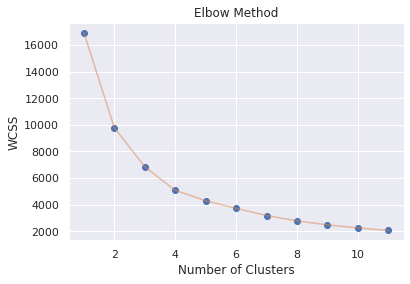

In [16]:
# finding out the proper number of clusters
# Within-Cluster Sum of Square
wcss = []
for i in range(1,12):
  kmeans_sk = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans_sk.fit(populardance_df)
  wcss.append(kmeans_sk.inertia_)
plt.plot(range(1,12), wcss, 'o')
plt.plot(range(1 , 12) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

**Organize similar songs into Clusters**

In [17]:
# instantiating model
kmeans_sk = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans_sk.fit_predict(populardance_df)

In [18]:
y_kmeans

array([1, 1, 1, ..., 3, 4, 4], dtype=int32)

In [19]:
# converting preditcions into a df
kmeans1 = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans1.columns = ['k_cluster']

In [20]:

# predictions as a df
print(kmeans1.shape)
kmeans1

(232725, 1)


k_cluster
0               1
1               1
2               1
3               5
4               5
...           ...
232720          4
232721          4
232722          3
232723          4
232724          4

[232725 rows x 1 columns]

**Now that we have organized the songs in Clusters, it's time to see if our clusters make any sense. To do that, let's concatenate on our goal to find popular songs that are dancible.**

In [21]:
# concatenating the cluster column to the dataframe
df_populardanceclusters1 = pd.concat([populardance_df, kmeans1], axis=1)

In [22]:
# checking the dataframe
print(df_populardanceclusters1.shape)
df_populardanceclusters1.head()

(232725, 3)


popularity  danceability  k_cluster
0        0.00      0.356292          1
1        0.01      0.571934          1
2        0.03      0.650252          1
3        0.00      0.196438          5
4        0.04      0.294067          5

In [23]:
fig = px.scatter_3d(df_populardanceclusters1, x='danceability', y='popularity',
              color='k_cluster')
fig.show()

In [24]:
# concatenating the cluster column to the dataframe
df_clusters1 = pd.concat([df_cluster, kmeans1], axis=1)

# checking the dataframe
print(df_clusters1.shape)
df_clusters1.head()

(232725, 19)


genre        artist_name  ... valence k_cluster
0  Movie     Henri Salvador  ...   0.814         1
1  Movie  Martin & les fées  ...   0.816         1
2  Movie    Joseph Williams  ...   0.368         1
3  Movie     Henri Salvador  ...   0.227         5
4  Movie       Fabien Nataf  ...   0.390         5

[5 rows x 19 columns]

Cluster Data Analysis:
Finding the cluster with highest popularity mean

In [25]:
# popularity mean by cluster
df_clusters1.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
0    59.195944
3    57.475872
2    42.910270
4    35.867639
5    23.604445
1    13.624259
Name: popularity, dtype: float64

In [26]:
# checking number of songs in each cluster
df_clusters1['k_cluster'].value_counts()

3    47786
4    44711
2    42338
0    39251
1    30380
5    28259
Name: k_cluster, dtype: int64

Conclusion after 1st iteration K-means:
The popularity mean is highest in cluster 0. Applying K-Means to further narrow down the number of songs to create popular playlist which are dancible

In [27]:
# statistical distribution of the data in each column, for each cluster
df_clusters1.groupby("k_cluster").describe() 

popularity                              ... valence                      
               count       mean        std   min  ...     25%     50%    75%    max
k_cluster                                         ...                              
0            39251.0  59.195944   8.680952  40.0  ...  0.3790  0.5610  0.738  0.992
1            30380.0  13.624259   9.397936   0.0  ...  0.3300  0.5210  0.724  1.000
2            42338.0  42.910270   8.896021  24.0  ...  0.1780  0.3230  0.506  0.983
3            47786.0  57.475872   7.987626  42.0  ...  0.2880  0.4370  0.611  0.981
4            44711.0  35.867639   7.257575   3.0  ...  0.4170  0.6160  0.790  0.991
5            28259.0  23.604445  11.886011   0.0  ...  0.0398  0.0968  0.228  1.000

[6 rows x 88 columns]

In [29]:
df_populardanceclusters1=df_populardanceclusters1.loc[df_populardanceclusters1['k_cluster'] == 0]
df_populardanceclusters1

popularity  danceability  k_cluster
135           0.65      0.715696          0
136           0.63      0.673855          0
137           0.62      0.756464          0
139           0.68      0.639524          0
141           0.64      0.657762          0
...            ...           ...        ...
232556        0.48      0.832636          0
232572        0.46      0.809033          0
232591        0.45      0.848729          0
232602        0.44      0.875550          0
232686        0.46      0.850874          0

[39251 rows x 3 columns]

In [30]:
df_populardanceclusters1.drop('k_cluster', axis=1, inplace=True)
df_populardanceclusters1

popularity  danceability
135           0.65      0.715696
136           0.63      0.673855
137           0.62      0.756464
139           0.68      0.639524
141           0.64      0.657762
...            ...           ...
232556        0.48      0.832636
232572        0.46      0.809033
232591        0.45      0.848729
232602        0.44      0.875550
232686        0.46      0.850874

[39251 rows x 2 columns]

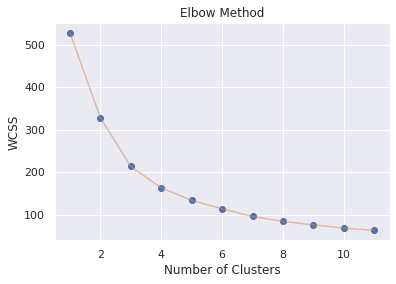

In [31]:
# finding out the proper number of clusters
# Within-Cluster Sum of Square
wcss = []
for i in range(1,12):
  kmeans_sk = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans_sk.fit(df_populardanceclusters1)
  wcss.append(kmeans_sk.inertia_)
plt.plot(range(1,12), wcss, 'o')
plt.plot(range(1 , 12) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [32]:
# instantiating model
kmeans_sk = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans_sk.fit_predict(df_populardanceclusters1)

In [33]:
# converting preditcions into a df
kmeans2 = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans2.columns = ['k_cluster']

In [34]:
# predictions as a df
print(kmeans2.shape)
kmeans2

(39251, 1)


k_cluster
0              2
1              2
2              2
3              2
4              2
...          ...
39246          3
39247          5
39248          3
39249          3
39250          3

[39251 rows x 1 columns]

In [35]:
# concatenating the cluster column to the dataframe
df_kmeans2 = pd.concat([populardance_df, kmeans2], axis=1)

# checking the dataframe
print(df_kmeans2.shape)
df_kmeans2.head()

(232725, 3)


popularity  danceability  k_cluster
0        0.00      0.356292        2.0
1        0.01      0.571934        2.0
2        0.03      0.650252        2.0
3        0.00      0.196438        2.0
4        0.04      0.294067        2.0

In [36]:
# concatenating the cluster column to the dataframe
df_clusters2 = pd.concat([df_cluster, kmeans2], axis=1)

# checking the dataframe
print(df_clusters2.shape)
df_clusters2.head()

(232725, 19)


genre        artist_name  ... valence k_cluster
0  Movie     Henri Salvador  ...   0.814       2.0
1  Movie  Martin & les fées  ...   0.816       2.0
2  Movie    Joseph Williams  ...   0.368       2.0
3  Movie     Henri Salvador  ...   0.227       2.0
4  Movie       Fabien Nataf  ...   0.390       2.0

[5 rows x 19 columns]

Cluster Data Analysis:
Finding the cluster with highest popularity mean

In [37]:
# popularity mean by cluster
df_clusters2.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
4.0    47.325287
1.0    44.903974
3.0    42.353343
2.0    42.025903
5.0    41.263839
0.0    40.664700
Name: popularity, dtype: float64

In [38]:
# checking number of songs in each cluster
df_clusters2['k_cluster'].value_counts()

0.0    8643
2.0    8609
5.0    8418
1.0    5436
3.0    4831
4.0    3314
Name: k_cluster, dtype: int64

Conclusion after 2nd iteration of K-means:
The popularity mean is highest in cluster 4. Applying K-Means to further narrow down the number of songs to create popular playlist which are dancible

In [39]:
df_kmeans3=df_kmeans2.loc[df_kmeans2['k_cluster'] == 4]
df_kmeans3

popularity  danceability  k_cluster
77           0.00      0.328398        4.0
80           0.00      0.618067        4.0
81           0.00      0.659908        4.0
82           0.00      0.704967        4.0
83           0.01      0.119193        4.0
...           ...           ...        ...
38113        0.23      0.619140        4.0
38133        0.28      0.582663        4.0
38156        0.43      0.913099        4.0
38191        0.27      0.583736        4.0
38231        0.30      0.419590        4.0

[3314 rows x 3 columns]

In [40]:
df_kmeans3.drop('k_cluster', axis=1, inplace=True)
df_kmeans3

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



popularity  danceability
77           0.00      0.328398
80           0.00      0.618067
81           0.00      0.659908
82           0.00      0.704967
83           0.01      0.119193
...           ...           ...
38113        0.23      0.619140
38133        0.28      0.582663
38156        0.43      0.913099
38191        0.27      0.583736
38231        0.30      0.419590

[3314 rows x 2 columns]

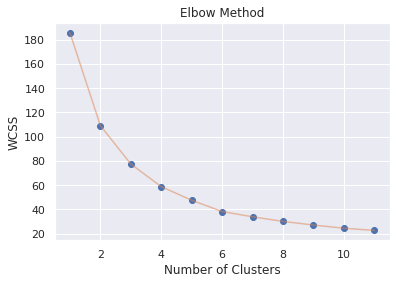

In [41]:
# finding out the proper number of clusters
# Within-Cluster Sum of Square
wcss = []
for i in range(1,12):
  kmeans_sk = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans_sk.fit(df_kmeans3)
  wcss.append(kmeans_sk.inertia_)
plt.plot(range(1,12), wcss, 'o')
plt.plot(range(1 , 12) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [42]:
# instantiating model
kmeans_sk = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans_sk.fit_predict(df_kmeans3)

In [43]:
# converting preditcions into a df
kmeans3 = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans3.columns = ['k_cluster']

In [44]:
# predictions as a df
print(kmeans3.shape)
kmeans3

(3314, 1)


k_cluster
0             4
1             1
2             1
3             1
4             4
...         ...
3309          1
3310          1
3311          2
3312          1
3313          1

[3314 rows x 1 columns]

In [45]:
# concatenating the cluster column to the dataframe
df_kmeans3 = pd.concat([populardance_df, kmeans3], axis=1)

In [46]:
# checking the dataframe
print(df_kmeans3.shape)
df_kmeans3.head()

(232725, 3)


popularity  danceability  k_cluster
0        0.00      0.356292        4.0
1        0.01      0.571934        1.0
2        0.03      0.650252        1.0
3        0.00      0.196438        1.0
4        0.04      0.294067        4.0

In [47]:
# concatenating the cluster column to the dataframe
df_clusters3 = pd.concat([df_cluster, kmeans3], axis=1)

# checking the dataframe
print(df_clusters3.shape)
df_clusters3.head()

(232725, 19)


genre        artist_name  ... valence k_cluster
0  Movie     Henri Salvador  ...   0.814       4.0
1  Movie  Martin & les fées  ...   0.816       1.0
2  Movie    Joseph Williams  ...   0.368       1.0
3  Movie     Henri Salvador  ...   0.227       1.0
4  Movie       Fabien Nataf  ...   0.390       4.0

[5 rows x 19 columns]

Cluster Data Analysis:
Finding the cluster with highest popularity mean

In [48]:
# popularity mean by cluster
df_clusters3.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
4.0    54.597285
1.0    52.214646
5.0    50.214876
2.0    46.902579
0.0    43.311175
3.0    41.257525
Name: popularity, dtype: float64

In [49]:
# checking number of songs in each cluster
df_clusters3['k_cluster'].value_counts()

0.0    1038
2.0     698
3.0     598
1.0     396
5.0     363
4.0     221
Name: k_cluster, dtype: int64

Conclusion after 3nd iteration of K-means:
The popularity mean is highest in cluster 4. Applying K-Means to further narrow down the number of songs to create popular playlist which are dancible

In [50]:
df_kmeans4=df_kmeans3.loc[df_kmeans3['k_cluster'] == 4]
df_kmeans4

popularity  danceability  k_cluster
0           0.00      0.356292        4.0
4           0.04      0.294067        4.0
7           0.15      0.385259        4.0
14          0.00      0.368094        4.0
15          0.00      0.569789        4.0
...          ...           ...        ...
3262        0.54      0.522583        4.0
3281        0.54      0.707113        4.0
3301        0.60      0.515073        4.0
3305        0.54      0.559060        4.0
3308        0.54      0.565497        4.0

[221 rows x 3 columns]

In [51]:
df_kmeans4.drop('k_cluster', axis=1, inplace=True)
df_kmeans4

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



popularity  danceability
0           0.00      0.356292
4           0.04      0.294067
7           0.15      0.385259
14          0.00      0.368094
15          0.00      0.569789
...          ...           ...
3262        0.54      0.522583
3281        0.54      0.707113
3301        0.60      0.515073
3305        0.54      0.559060
3308        0.54      0.565497

[221 rows x 2 columns]

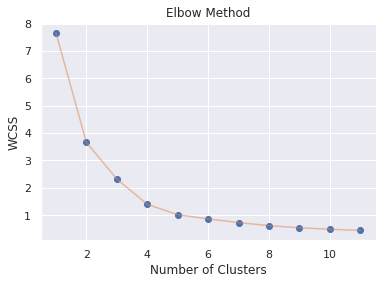

In [52]:
# finding out the proper number of clusters
# Within-Cluster Sum of Square
wcss = []
for i in range(1,12):
  kmeans_sk = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans_sk.fit(df_kmeans4)
  wcss.append(kmeans_sk.inertia_)
plt.plot(range(1,12), wcss, 'o')
plt.plot(range(1 , 12) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [53]:
# instantiating model
kmeans_sk = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans_sk.fit_predict(df_kmeans4)

In [54]:
# converting preditcions into a df
kmeans4 = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans4.columns = ['k_cluster']

In [55]:
# predictions as a df
print(kmeans4.shape)
kmeans4

(221, 1)


k_cluster
0            3
1            3
2            3
3            3
4            3
..         ...
216          1
217          5
218          1
219          1
220          1

[221 rows x 1 columns]

In [56]:
# concatenating the cluster column to the dataframe
df_kmeans4 = pd.concat([populardance_df, kmeans4], axis=1)

# checking the dataframe
print(df_kmeans4.shape)
df_kmeans4.head()

(232725, 3)


popularity  danceability  k_cluster
0        0.00      0.356292        3.0
1        0.01      0.571934        3.0
2        0.03      0.650252        3.0
3        0.00      0.196438        3.0
4        0.04      0.294067        3.0

In [57]:
# concatenating the cluster column to the dataframe
df_clusters4 = pd.concat([df_cluster, kmeans4], axis=1)

# checking the dataframe
print(df_clusters4.shape)
df_clusters4.head()

(232725, 19)


genre        artist_name  ... valence k_cluster
0  Movie     Henri Salvador  ...   0.814       3.0
1  Movie  Martin & les fées  ...   0.816       3.0
2  Movie    Joseph Williams  ...   0.368       3.0
3  Movie     Henri Salvador  ...   0.227       3.0
4  Movie       Fabien Nataf  ...   0.390       3.0

[5 rows x 19 columns]

Cluster Data Analysis:
Finding the cluster with highest popularity mean

In [58]:
# popularity mean by cluster
df_clusters4.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
2.0    34.083333
4.0    28.147541
1.0    26.245614
5.0    24.900000
0.0    20.242424
3.0     1.333333
Name: popularity, dtype: float64

In [59]:
# checking number of songs in each cluster
df_clusters4['k_cluster'].value_counts()

4.0    61
1.0    57
5.0    40
0.0    33
2.0    24
3.0     6
Name: k_cluster, dtype: int64

Conclusion after 3rd iteration of K-means:
The popularity mean is highest in cluster 2 and there are 24 songs in cluster 2.

Playlist of top 24 songs that are dancible are:

In [60]:
df_playlist=df_clusters4.loc[df_clusters4['k_cluster'] == 2]
df_playlist

genre         artist_name  ... valence k_cluster
20   Movie   Martin & les fées  ...   0.320       2.0
24   Movie      Henri Salvador  ...   0.396       2.0
30   Movie              Chorus  ...   0.812       2.0
60   Movie      Marie Ruggieri  ...   0.193       2.0
69   Movie              Chorus  ...   0.914       2.0
87   Movie              Chorus  ...   0.373       2.0
99   Movie              Chorus  ...   0.190       2.0
111  Movie       Les Hérissons  ...   0.845       2.0
116  Movie              Chorus  ...   0.745       2.0
124  Movie  Jean Claude Corbel  ...   0.409       2.0
126  Movie      Henri Salvador  ...   0.878       2.0
136    R&B             Rihanna  ...   0.323       2.0
147    R&B        Jason Derulo  ...   0.620       2.0
149    R&B            Big Sean  ...   0.277       2.0
151    R&B        Tierra Whack  ...   0.600       2.0
153    R&B               6LACK  ...   0.184       2.0
157    R&B             Tove Lo  ...   0.348       2.0
159    R&B                Joji  ...   0.509       2.0
165    R&B          MIKExANGEL  ...   0.343       2.0
171    R&B              T-Pain  ...   0.306       2.0
177    R&B                Yuna  ...   0.355       2.0
194    R&B         Iggy Azalea  ...   0.527       2.0
196    R&B       PARTYNEXTDOOR  ...   0.725       2.0
213    R&B      Olivia O'Brien  ...   0.326       2.0

[24 rows x 19 columns]